目标编码针对分类特征，而不是针对数值特征。它是一种将类别编码为数字的方法，而且还是用目标来创建编码。

In [1]:
import pandas as pd
autos=pd.read_csv("D:/vscode/vscode_python/feature_engineering/data/autos.csv")

# Target Encoding 目标编码

目标编码：用从目标派生出的某个数字来代替特征类别的任何编码

In [2]:
autos["make_encoded"]=autos.groupby("make")["price"].transform("mean")

autos[["make","price","make_encoded"]].head(10)

,make,price,make_encoded
0,alfa-romero,13495,15498.333333
1,alfa-romero,16500,15498.333333
2,alfa-romero,16500,15498.333333
3,audi,13950,17859.166667
4,audi,17450,17859.166667
5,audi,15250,17859.166667
6,audi,17710,17859.166667
7,audi,18920,17859.166667
8,audi,23875,17859.166667
9,bmw,16430,26118.750000


这种目标编码有时称为均值编码。应用于二进制目标时，也被称为bin计数。(可能遇到的其他名称：可能性编码，影响编码，留一编码)

# Smoothing 平滑

目标编码问题：1.未知类别：目标编码会特别容易出现过拟合的风险，这意味着它们需要在一个独立的“编码”数据集上进行训练。当你将编码与未来的数据集合并时，Pandas会为编码数据集中未出现的类别填充缺失值。你需要想办法来填补这些缺失值。2.稀有类别：当某个类别在数据集中出现次数很少时，对其组内计算的任何统计信息可能不会很准确。对稀有类别进行目标编码可能会增加过拟合的风险。

解决方法：添加平滑处理。思路：将类别内平均值与总体平均值进行混合。稀有类别对其类别平均值的权重较小，而缺失的类别只得到总体平均值。

encoding=weight*in_categrory+(1-weight)*overall

编码值 = 权重 * 类别内平均值 + (1 - 权重) * 总体平均值
（权重是在0到1之间的值，根据类别频率计算得出）

权重 = n / (n + m);
其中 n 是数据集中该类别出现的总次数。参数 m 决定了“平滑因子”。较大的 m 值会更多地考虑总体估计值。在选择 m 的值时，要考虑你期望类别有多大的噪声。车辆价格在每个制造商内是否会有很大的变化？你是否需要大量数据才能得出准确的估计值？如果是的话，可能更好地选择较大的 m 值；如果每个制造商的平均价格相对稳定，较小的 m 值可能就可以了。

目标编码的使用案例包括：

1.高基数特征：对于具有大量类别的特征，进行编码可能会引发问题：使用独热编码会生成过多的特征，而其他替代方法，如标签编码，可能不适用于该特征。目标编码利用特征与目标之间的关系，为类别派生数值，从而解决高基数特征的编码问题。

2.领域相关特征：根据先前的经验，你可能怀疑某个分类特征即使在特征度量上得分较低，仍然应该是重要的。目标编码可以帮助揭示特征的真正信息价值，即使它在特征度量中得分不高。

# 示例

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

sns.set_style("whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
warnings.filterwarnings('ignore')


df = pd.read_csv("D:/vscode/vscode_python/feature_engineering/data/movielens1m.csv")
df = df.astype(np.uint8, errors='ignore') # reduce memory footprint
print("Number of Unique Zipcodes: {}".format(df["Zipcode"].nunique()))

Number of Unique Zipcodes: 3439


In [9]:
x=df.copy()
y=x.pop("Rating")

x_encode=x.sample(frac=0.25)
y_encode=y[x_encode.index]
x_pretrain=x.drop(x_encode.index)
y_train=y[x_pretrain.index]

In [17]:
from category_encoders import MEstimateEncoder

encoder=MEstimateEncoder(cols=["Zipcode"],m=5.0)

encoder.fit(x_encode,y_encode)

x_train=encoder.transform(x_pretrain)

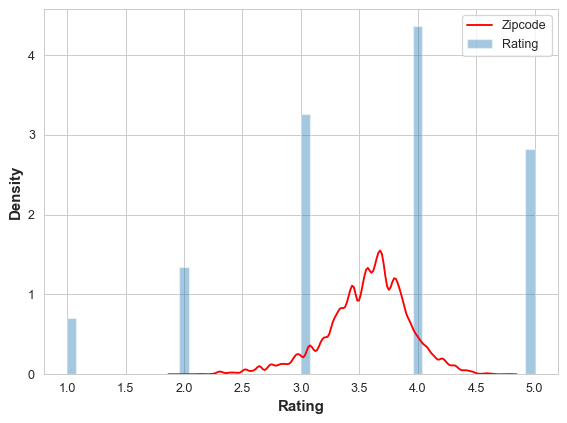

In [21]:
#将目标值与编码值比较

plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(x_train.Zipcode, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Zipcode', 'Rating']);
